<a href="https://colab.research.google.com/github/nikitagund17/DeepLearning/blob/main/Handwritten_Digit_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Habdwritten digit CNN Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the handwritten digit dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Viewing the first image in the train data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

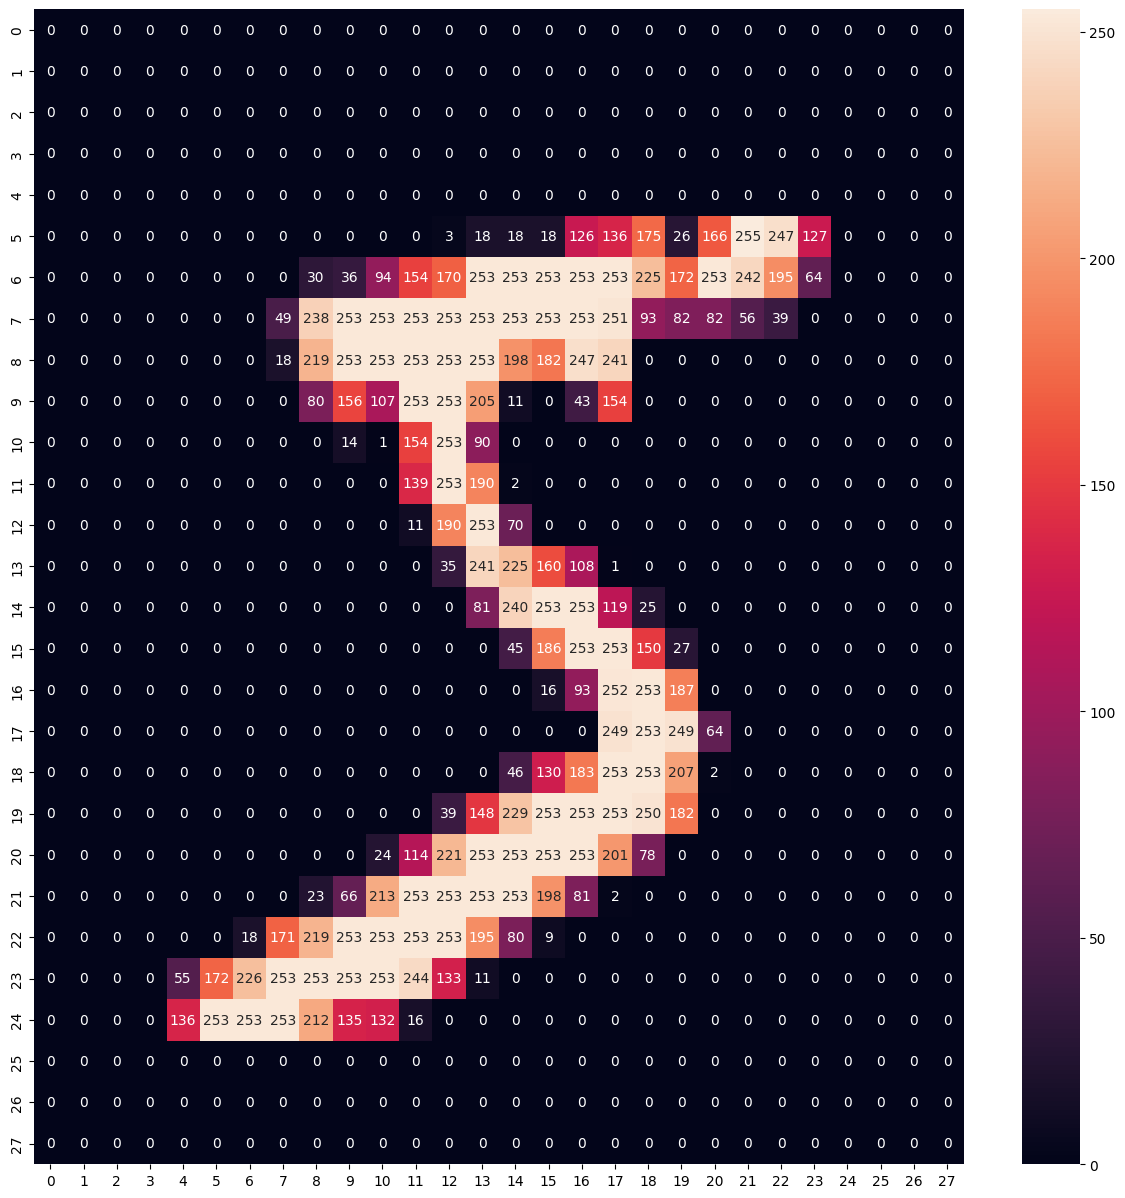

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()


In [9]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [10]:
xtrain[0].shape

(28, 28)

## Visialize top 9 images from xtrain data

In [11]:
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


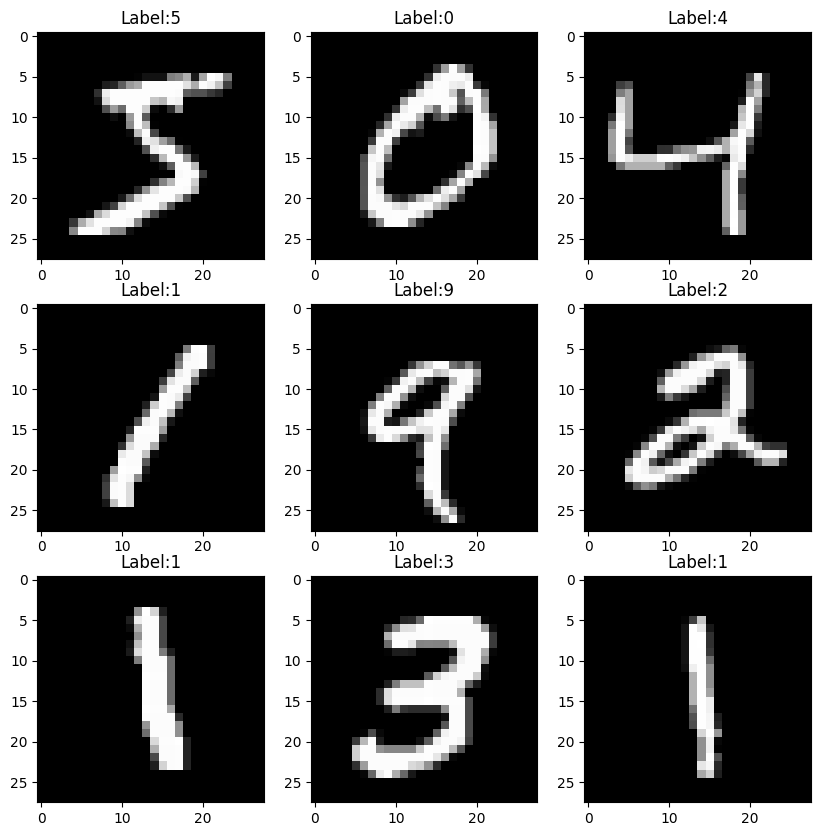

In [12]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'Label:{ytrain[i]}')

In [13]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
len(np.unique(ytrain))

10

## Because i have mre than 2 classes above becomes a multiclass classification problem



## PreProcessing the data

In [15]:
# scale the x data divide by 255
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [16]:
# Apply one hot encoding on target feature because it multiclass classification problem
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [17]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Create a simple covent

# 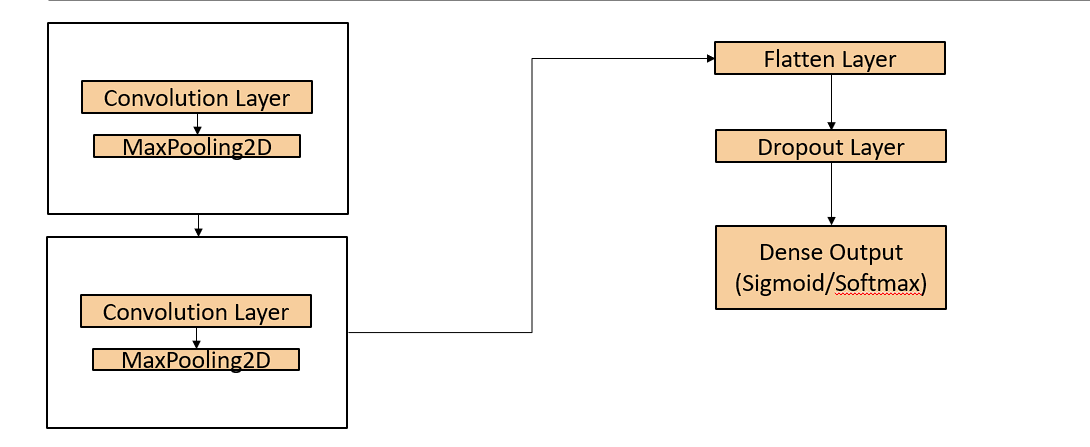

# 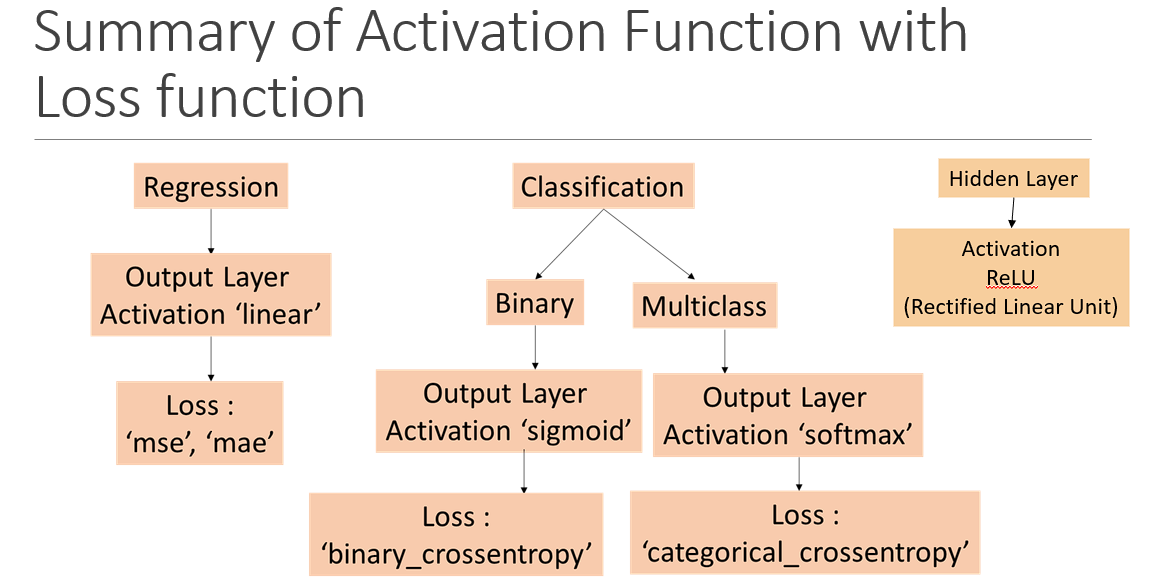

In [21]:
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dropout,Dense

In [22]:
model=Sequential()

# Add Input layer
model.add(Input(shape=(28,28,1)))

# Add convolution layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

# Add Maxpooling Layer 1
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

# Add max Pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Droupout Layer
model.add(Dropout(rate=0.5))

#Dense layer Multiclass-softmax
model.add(Dense(units=10,activation='softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Complile the model

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Train the neural net

In [25]:
hist=model.fit(xtrain_scl,ytrain_cat,validation_split=0.1,epochs=15)

Epoch 1/15
1688/1688 [==============================] - 14s 6ms/step - loss: 0.2299 - accuracy: 0.9287 - val_loss: 0.0609 - val_accuracy: 0.9835
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0839 - accuracy: 0.9739 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 3/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0391 - val_accuracy: 0.9895
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0492 - accuracy: 0.9836 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0411 - accuracy: 0.9865 - val_loss: 0.0316 - val_accura

## Plot the learning curve for the model

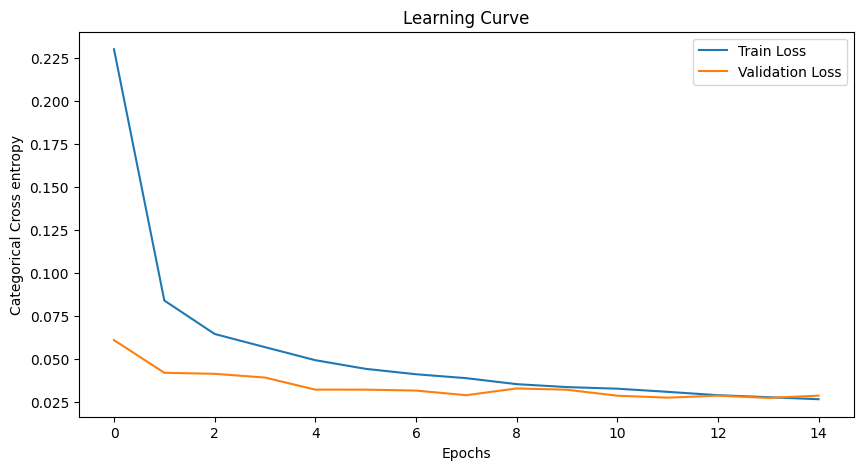

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Evaluate model in train and test

In [27]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - accuracy: 0.9971


[0.010095134377479553, 0.9971166849136353]

In [28]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9927


[0.02355225943028927, 0.9926999807357788]

## Predict the probability for train and test

In [29]:
yprob_train=model.predict(xtrain_scl)

yprob_test=model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [30]:
yprob_train[0:5]

array([[5.2870231e-14, 1.6240332e-12, 4.7101992e-12, 6.8349629e-03,
        6.9369267e-16, 9.9316484e-01, 3.4047328e-15, 4.4540571e-10,
        3.2076137e-08, 2.2398083e-07],
       [9.9999976e-01, 9.2248431e-16, 1.3937539e-07, 2.4220964e-12,
        2.0803382e-11, 3.9139369e-11, 1.9997138e-08, 2.6059304e-12,
        9.0565848e-09, 1.3696983e-07],
       [3.5413008e-18, 1.2569626e-08, 6.7767031e-10, 3.5398054e-12,
        9.9999976e-01, 8.0536175e-13, 8.1708342e-14, 4.4528360e-08,
        1.1080910e-10, 1.9926598e-07],
       [2.0646794e-08, 9.9998629e-01, 2.1420249e-06, 8.3728036e-10,
        7.1917748e-06, 5.5632321e-10, 4.2328148e-07, 2.9528835e-06,
        8.7480242e-07, 3.2031306e-08],
       [4.4459784e-13, 5.9797549e-12, 1.7440217e-09, 1.5366211e-09,
        1.4211256e-04, 9.4479069e-10, 8.2833310e-14, 1.8228955e-07,
        1.1874678e-05, 9.9984574e-01]], dtype=float32)

In [31]:
yprob_train[0]

array([5.2870231e-14, 1.6240332e-12, 4.7101992e-12, 6.8349629e-03,
       6.9369267e-16, 9.9316484e-01, 3.4047328e-15, 4.4540571e-10,
       3.2076137e-08, 2.2398083e-07], dtype=float32)

## Predctions for train and test

In [33]:
import pandas as pd
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

In [34]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [35]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [37]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plot the confusion matrix

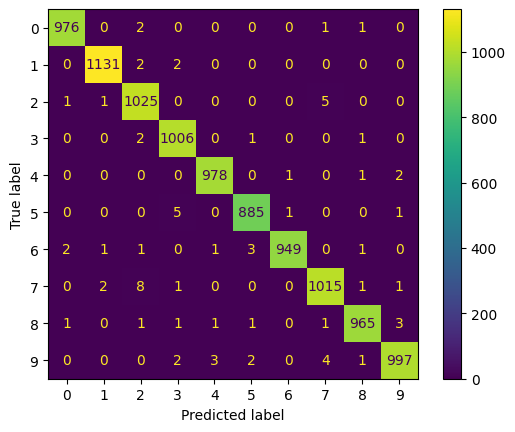

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

## Print the classification report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Save the keras model for future use

In [40]:
model.save('HandWrittenModel.keras')

## Load the above model

In [43]:
from keras.models import load_model
m=load_model('/content/HandWrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0